In [5]:
import random

In [3]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 13.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 8.4 MB/s eta 0:00:009.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 13.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 KB 5.9 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.svm import SVC
a=SVC()
a?

In [2]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
A=AdaBoostClassifier()
A?

In [3]:
data = pd.read_excel('/home/tar-tt085-aryan/Documents/vessel.xlsx')

In [4]:
data.sample(5)

,MMSI,Latitude,Longitude,Timestamp,Speed (knots),Heading,Temperature (°C),Range,Turning Rate,Stopping,Course,AIS Signal
25,789012345,38.901,-69.456,2024-05-30 14:05:00,10.5,315,23.8,65,-0.4,Yes,300,Yes
57,234567890,39.234,-77.123,2024-05-30 16:45:00,9.2,135,22.0,40,0.4,Yes,270,Yes
52,456789012,36.678,-71.456,2024-05-30 16:20:00,11.0,270,24.5,70,-0.8,Yes,60,No
9,456789012,36.789,-75.678,2024-05-30 12:45:00,9.5,200,22.0,70,0.1,Yes,180,Yes
48,901234567,37.345,-73.123,2024-05-30 16:00:00,11.5,225,24.8,50,-0.6,Yes,60,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
le=LabelEncoder()

In [7]:
data['Stopping'] = le.fit_transform(data['Stopping'])
data['AIS Signal'] = le.fit_transform(data['AIS Signal'])


In [8]:
data.head()

,MMSI,Latitude,Longitude,Timestamp,Speed (knots),Heading,Temperature (°C),Range,Turning Rate,Stopping,Course,AIS Signal
0,123456789,34.567,-76.789,2024-05-30 12:00:00,10.2,150,23.5,50,0.8,0,120,1
1,987654321,40.123,-73.456,2024-05-30 12:05:00,8.5,270,21.2,70,-0.5,1,180,1
2,456789123,36.789,-70.123,2024-05-30 12:10:00,12.0,45,25.0,60,1.2,0,90,0
3,789123456,38.456,-72.789,2024-05-30 12:15:00,9.8,180,22.8,55,-0.3,1,210,1
4,234567891,33.789,-75.456,2024-05-30 12:20:00,11.5,315,24.6,45,0.9,0,300,0


In [9]:
# Extracting x (input features)
x = data[['Latitude', 'Longitude', 'Speed (knots)', 'Heading', 'Temperature (°C)', 'Range', 'Turning Rate', 'Stopping', 'Course']]

# Extracting y (target variable)
y = data['AIS Signal']


In [10]:
data.sample()

,MMSI,Latitude,Longitude,Timestamp,Speed (knots),Heading,Temperature (°C),Range,Turning Rate,Stopping,Course,AIS Signal
37,890123456,32.678,-74.456,2024-05-30 15:05:00,9.5,90,22.2,65,0.2,1,270,1


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

# hyperparameter tuning

In [12]:
models = {
    'AdaBoost': AdaBoostClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'DecisionTree': DecisionTreeClassifier()
}

param_grids = {
    'AdaBoost': {
        'n_estimators': [50, 100,150],
        'learning_rate': [0.1, 1,10]
    },
    'RandomForest': {
        'n_estimators': [50, 100,150],
        'max_depth': [10, 20,30],
        'min_samples_split': [2, 5,7]
    },
    'SVM': {
        'C': [1, 10,100],
        'gamma': [0.1, 0.01,0.001],
        'kernel': ['rbf','linear']
    },
    'LogisticRegression': {
        'C': [1, 10],
        'solver': ['liblinear']
    },
    'DecisionTree': {
        'max_depth': [10, 20,30],
        'min_samples_split': [2, 5,7]
    }
}


# initalizing

In [13]:
best_estimators = {}
best_scores = {}

# GridSearchCV
for model_name in models.keys():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=10, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")



Training AdaBoost...


/home/tar-tt085-aryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/tar-tt085-aryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/tar-tt085-aryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/tar-tt085-aryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score for AdaBoost: 0.6366666666666666
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 150}
Best cross-validation score for RandomForest: 0.71
Training SVM...
Best parameters for SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.6799999999999999
Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 10, 'solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.5666666666666667
Training DecisionTree...
Best parameters for DecisionTree: {'max_depth': 20, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.7133333333333333


In [14]:
results = {}
for model_name in best_estimators.keys():
    print(f"Evaluating {model_name}")
    y_pred = best_estimators[model_name].predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'classification_report': report,
        'confusion_matrix': cm
    }
    print(f"Classification report for {model_name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}\n")

results


Evaluating AdaBoost
Classification report for AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.71      0.71      0.71        14

    accuracy                           0.56        18
   macro avg       0.36      0.36      0.36        18
weighted avg       0.56      0.56      0.56        18

Confusion matrix for AdaBoost:
[[ 0  4]
 [ 4 10]]

Evaluating RandomForest
Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.86      0.80        14

    accuracy                           0.67        18
   macro avg       0.38      0.43      0.40        18
weighted avg       0.58      0.67      0.62        18

Confusion matrix for RandomForest:
[[ 0  4]
 [ 2 12]]

Evaluating SVM
Classification report for SVM:
              precision    recall  f1-score   support

           0       

{'AdaBoost': {'classification_report': {'0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 4.0},
   '1': {'precision': 0.7142857142857143,
    'recall': 0.7142857142857143,
    'f1-score': 0.7142857142857143,
    'support': 14.0},
   'accuracy': 0.5555555555555556,
   'macro avg': {'precision': 0.35714285714285715,
    'recall': 0.35714285714285715,
    'f1-score': 0.35714285714285715,
    'support': 18.0},
   'weighted avg': {'precision': 0.5555555555555556,
    'recall': 0.5555555555555556,
    'f1-score': 0.5555555555555556,
    'support': 18.0}},
  'confusion_matrix': array([[ 0,  4],
         [ 4, 10]])},
 'RandomForest': {'classification_report': {'0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 4.0},
   '1': {'precision': 0.75,
    'recall': 0.8571428571428571,
    'f1-score': 0.8,
    'support': 14.0},
   'accuracy': 0.6666666666666666,
   'macro avg': {'precision': 0.375,
    'recall': 0.42857142857142855,
    'f1-score

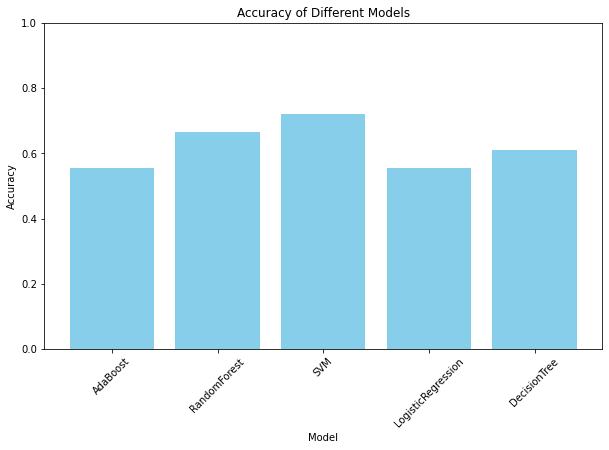

In [15]:
import matplotlib.pyplot as plt

model_names = results.keys()
accuracies = [results[model]['classification_report']['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
